## Clase del 13/11. Convergencia


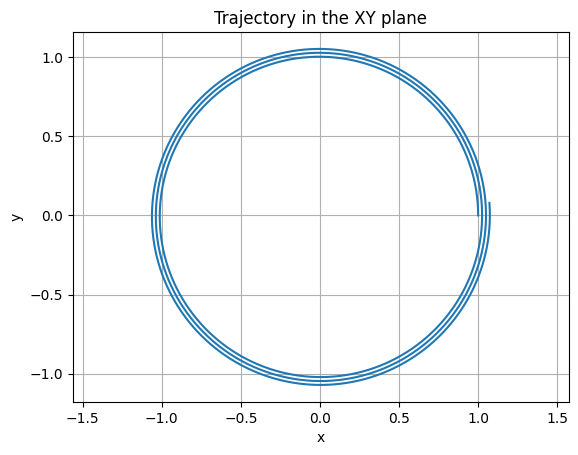

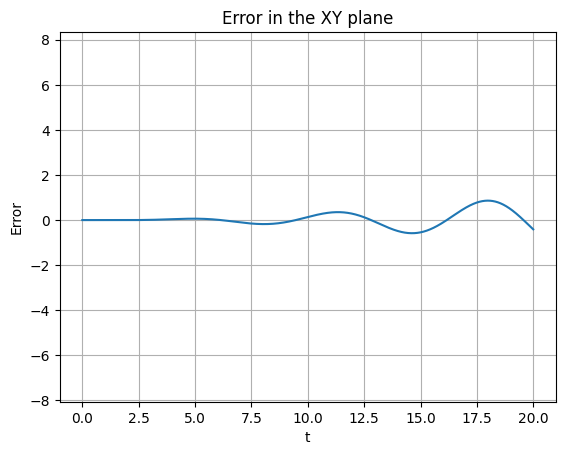

In [ ]:
"""
Resolve two-body problem using Crank-Nicolson method with functions and plot the trajectory.
"""

from numpy import concatenate, zeros, reshape, array, linspace, shape, log
from numpy.linalg import norm
from spicy import stats
import matplotlib.pyplot as plt
from scipy.linalg import solve

def F(U, t):
    r = U[0:2]
    rdot = U[2:4]
    return concatenate((rdot, -r/norm(r)**3), axis=None)

def derivative(f, x, dx):
    h = 1e-7
    return (f(x + dx) - f(x - dx)) / (2 * h)

def Jacobian(f, x):
    J = zeros((len(x), len(x)))
    for j in range(len(x)):
        dx = zeros((len(x)))
        dx[j] = 1e-7
        J[:, j] = derivative(f, x, dx)
    return J

def Gauss(A, b):
    return solve(A, b)

def Newton(f, x0):
    x = x0
    Dx = 1.0
    while norm(Dx) > 1e-10:
        A = Jacobian(f, x)
        Dx = Gauss(A, -f(x))
        x = x + Dx
    return x

def Euler(U1, t1, t2, F):

    dt = t2 - t1
    return U1 + dt*F(U1, t1)


def Crank_Nicolson(U1, t1, t2, F):
    dt = t2 - t1
    a = U1 + dt/2 * F(U1, t1) # Esto es constante
    def G(x):
        return x - a - dt/2 * F(x, t2)
    return Newton(G, U1)

def Cauchy_problem(F, U0, t, Temporal_scheme):
    N = len(t) - 1 # t0, t1, ..., tN es de longitud N+1
    Nv = len(U0) # Numero de variables
    U = zeros((N+1, Nv))
    U[0,:] = U0
    for n in range(N):
        U[n+1,:] = Temporal_scheme(U[n,:], t[n], t[n+1], F)
    return U

def Cauchy_Error(F, U0, t, Temporal_scheme, q):

    N = len(t) - 1
    Nv = len(U0)

    E = zeros((N+1, Nv))
    t1 = t[:]
    t2 = linspace(t[0], t[N], 2*N+1)

    U1 = Cauchy_problem(F, U0, t1, Temporal_scheme)
    U2 = Cauchy_problem(F, U0, t2, Temporal_scheme)

    for n in range(0, N+1):
        E[n,:] = (U2[2*n,:] - U1[n,:])/(1-1/2**q)

    return U1, E

def convergence_rate(Temporal_scheme, F=oscilator, U0=U0, t=t)
    
    N_meshes = 5
    N_mesh = array([10, 20, 40, 50, 80])
    E = zeros(N_meshes)
    N = len(t)

    for n in range(N_meshes):
        t_n = linspace(t[0], t[N], N_mesh[n])
        U1, E = Cauchy_Error(F, U0, t_n, Temporal_scheme, g)

    logN=log(N_mesh)
    logE=log(E)

def test_Cauchy():
    # Variables
    U0 = ([1, 0, 0, 1])
    T = 200
    N = 10000
    t = linspace(0, T, N+1)

    U = Cauchy_problem(F, U0, t, Euler)

    # Plot trajectory
    plt.plot(U[:, 0], U[:, 1])  # Column 0 = x, Column 1 = y
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Trajectory in the XY plane')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

def test_Error():
    # Variables
    U0 = ([1, 0, 0, 1])
    T = 20
    N = 10000
    t = linspace(0, T, N+1)
    q = 1

    U, E = Cauchy_Error(F, U0, t, Euler, q)

    # Plot trajectory
    plt.plot(U[:, 0], U[:, 1])  # Column 0 = x, Column 1 = y
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Trajectory in the XY plane')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

    plt.plot(t, E[:, 0])  # Column 0 = x, Column 1 = y
    plt.xlabel('t')
    plt.ylabel('Error')
    plt.title('Error in the XY plane')
    plt.axis('equal')
    plt.grid(True)
    plt.show()

test_Error()